# Importing Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading Dataset**

In [2]:
iris = pd.read_csv(r"C:\Users\Vikas\OneDrive\Desktop\CipherByte\Iris Flower - Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.duplicated().sum()

0

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Dataset Description:** The Iris dataset consists of 150 samples of iris flowers, with each sample belonging to one of three different species: Setosa, Versicolor, or Virginica. There are 50 samples for each species.

**Features:** The dataset includes four features (attributes) for each sample:

Sepal Length (in centimeters)

Sepal Width (in centimeters)

Petal Length (in centimeters)

Petal Width (in centimeters)

In [7]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Droping Id Column**: Because it did not provide any valuable information for our analysis.

In [8]:
iris = iris.drop(['Id'], axis = 1)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Getting Five point summery**

In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


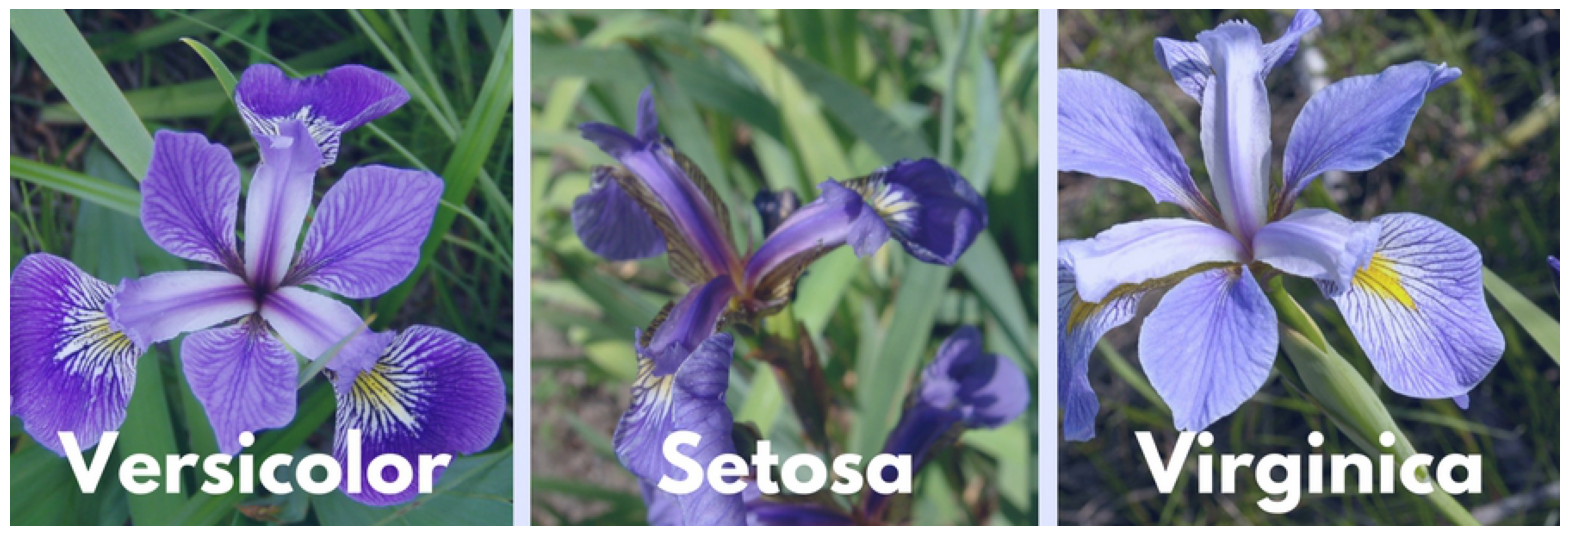

In [11]:
# Loading the iris image
import matplotlib.image as img
img = img.imread('iris_types.jpg')
plt.figure(figsize = (20,15))
plt.axis('off')
plt.imshow(img)

**looking for the Outlier**


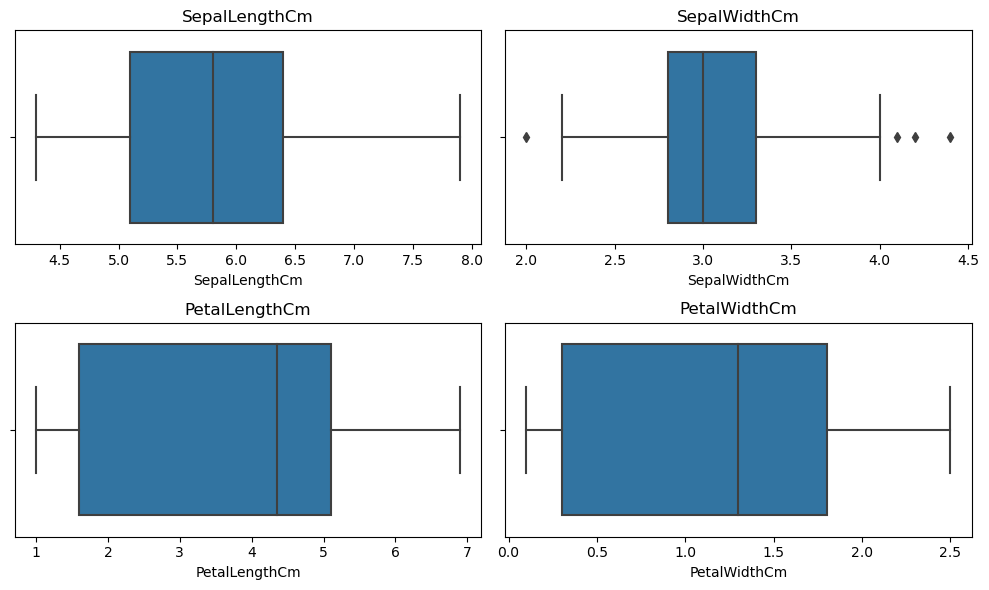

In [12]:
plt.figure(figsize = (10,6))
for i, cols in enumerate(iris.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = iris[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

As we can see in the above graph that 'SepalWidthCm' column have outlier. lets try to remove outlier

In [13]:
def remove_outlier(df):
    q1 = np.percentile(df,25)
    q3 = np.percentile(df,75)
    iqr = q3-q1
    lower_fence = q1-1.5*iqr
    upper_fence = q3+1.5*iqr
    outlier_mask = (df<lower_fence)|(df>upper_fence)
    filtered_data = df[~(outlier_mask)]
    return filtered_data

In [14]:
for cols in iris.columns[:-1]:
    iris[cols] = remove_outlier(iris[cols])

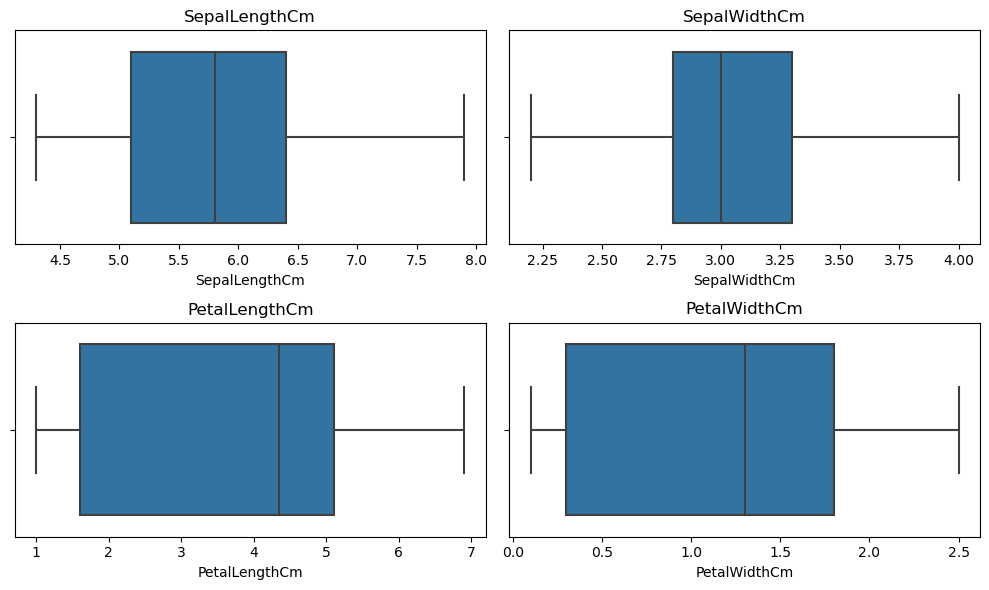

In [15]:
plt.figure(figsize = (10,6))
for i, cols in enumerate(iris.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = iris[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

Outlier removal done successfully.

**Comparing Sepal Length and Sepal Width**

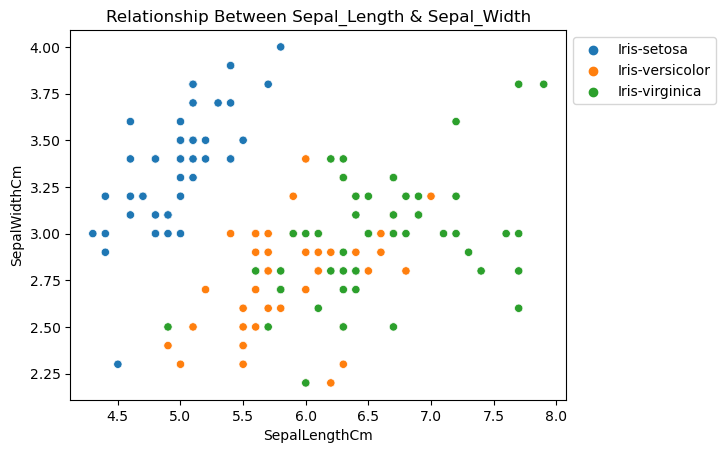

In [16]:
sns.scatterplot(x = iris['SepalLengthCm'], y = iris['SepalWidthCm'], hue = iris['Species'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Relationship Between Sepal_Length & Sepal_Width')
plt.show()

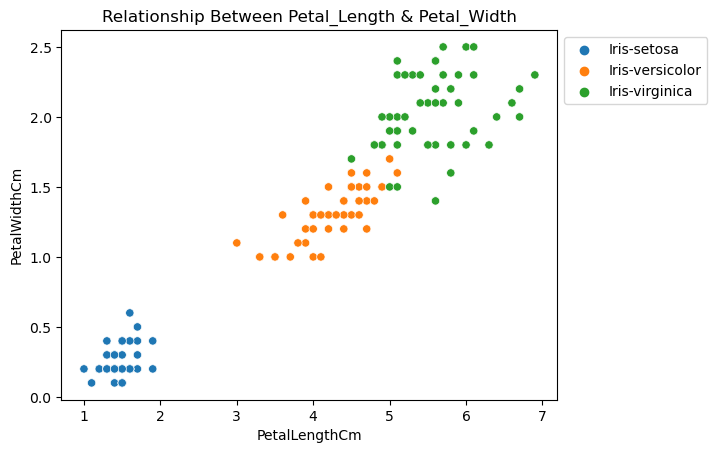

In [17]:
sns.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Relationship Between Petal_Length & Petal_Width')
plt.show()

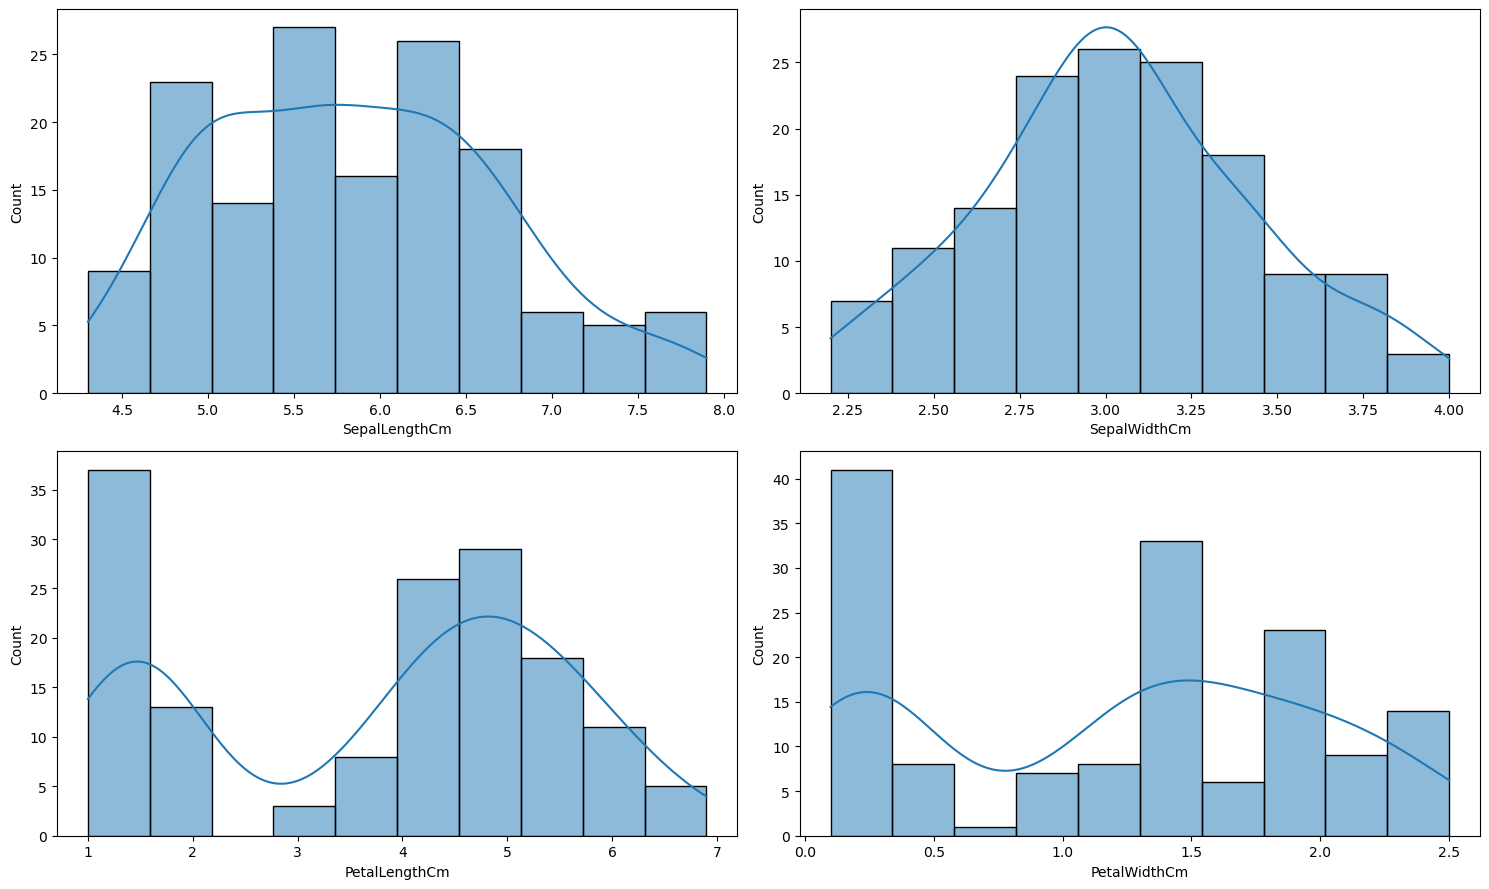

In [18]:
plt.figure(figsize = (15,9))
for i, cols in enumerate(iris.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.histplot(iris[cols], kde = True, bins = 10)
plt.tight_layout()
plt.show()

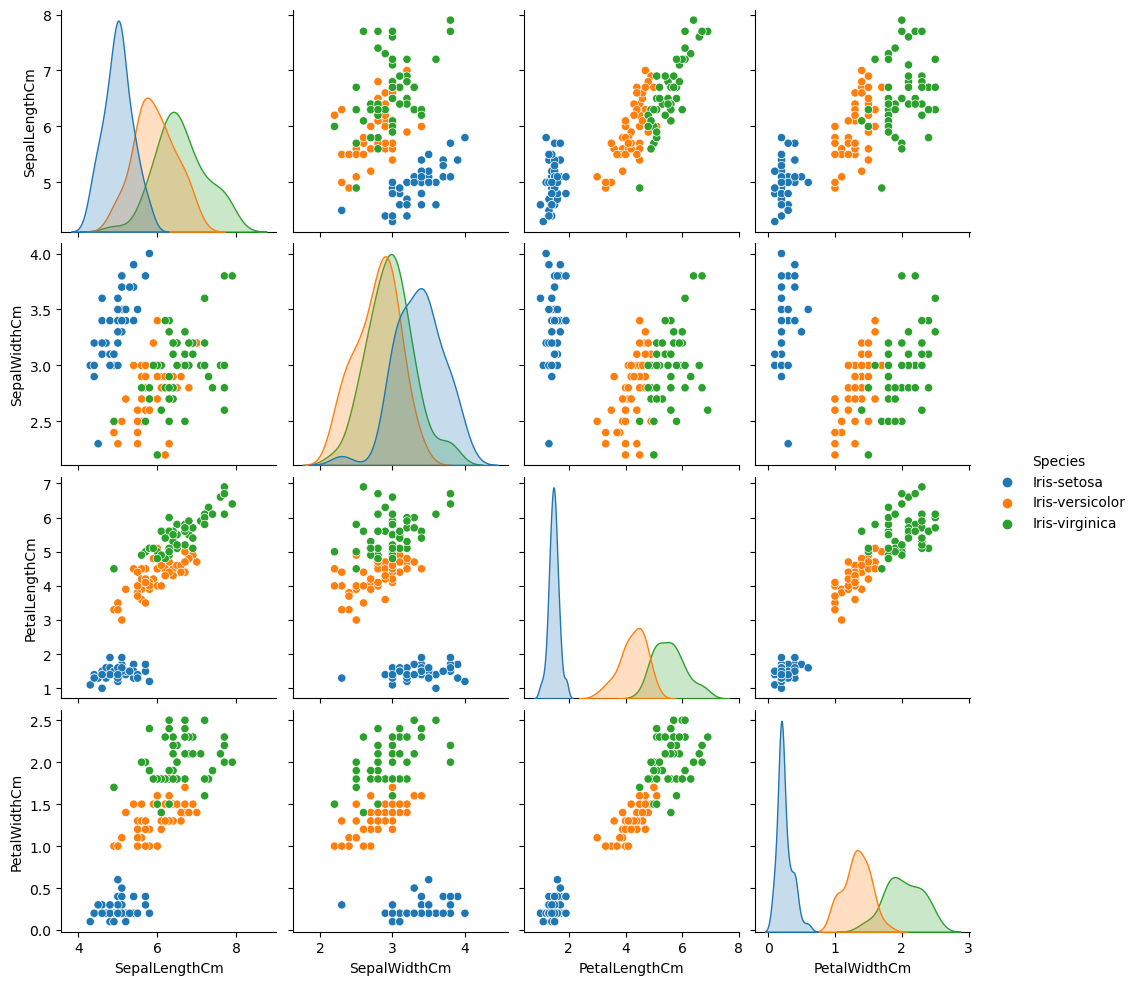

In [19]:
sns.pairplot(iris, hue="Species")
plt.show()

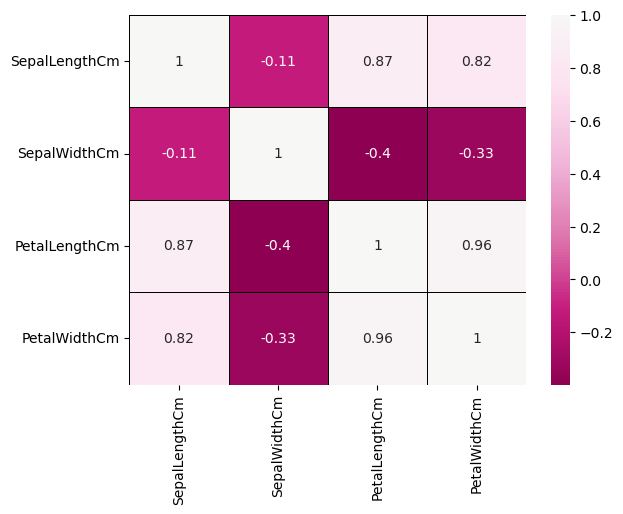

In [20]:
sns.heatmap(iris.corr(),annot = True,linewidths=0.5,linecolor='black',cmap='PiYG',center=True)
plt.show()

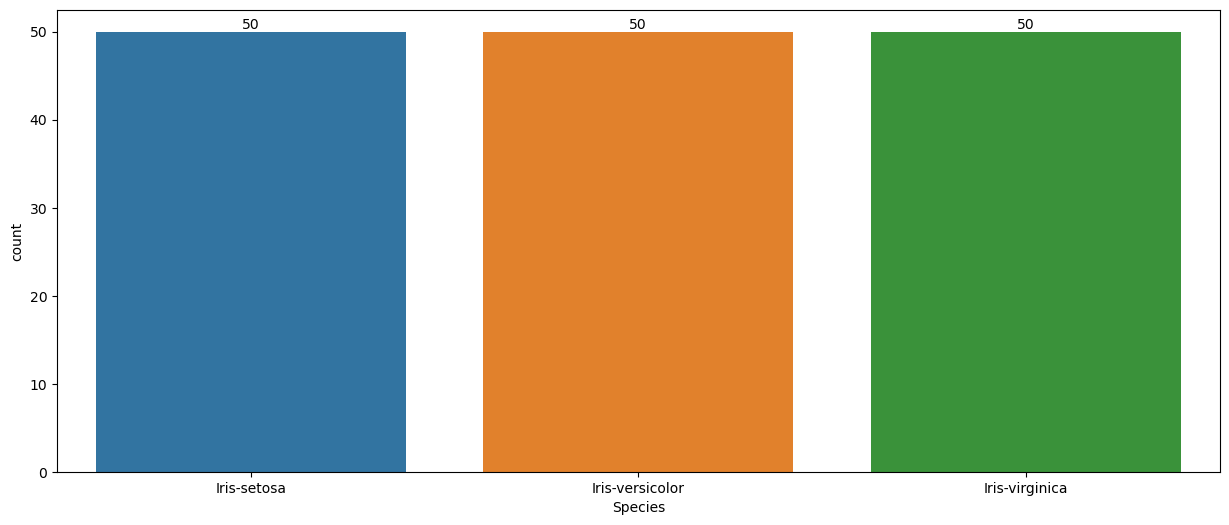

In [21]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = iris['Species'])
for bars in ax.containers:
    ax.bar_label(bars)


Dataset is well-balanced, with an equal number of samples for each of the three species. The four feature measurements have different scales and distributions, and they are continuous numerical variables.

# Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label = LabelEncoder()

In [24]:
iris['Species'] = label.fit_transform(iris['Species'])

In [25]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
iris = iris.dropna()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = iris.iloc[:,:-1]

In [30]:
y = iris.iloc[:,-1]

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=143)

In [32]:
X_train.shape, X_test.shape

((116, 4), (30, 4))

In [33]:
y_train.shape, y_test.shape

((116,), (30,))

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[ 0.57826809, -0.63384015,  0.97997905,  1.2401355 ],
       [ 0.46201315, -0.3749477 ,  0.97997905,  0.71270849],
       [-1.51432076,  1.4372995 , -1.65436262, -1.39699957],
       [ 0.46201315,  0.91951459,  0.97997905,  1.50384901],
       [ 0.57826809,  0.40172967,  0.35002778,  0.31713823],
       [ 0.81077796, -0.3749477 ,  0.40729608,  0.05342472],
       [ 0.22950328, -0.3749477 ,  0.46456438,  0.18528147],
       [ 0.92703289, -0.11605524,  0.75090586,  1.37199225],
       [ 1.15954277,  0.14283722,  0.57910097,  0.31713823],
       [-1.28181089, -0.11605524, -1.42528943, -1.52885632],
       [ 1.50830757,  1.4372995 ,  1.26632054,  1.63570576],
       [ 0.69452302, -0.63384015,  0.40729608,  0.31713823],
       [ 0.92703289,  0.14283722,  0.29275948,  0.18528147],
       [ 1.39205264, -0.11605524,  1.15178394,  1.10827875],
       [-0.11926153, -0.89273261,  0.12095459, -0.34214554],
       [ 1.2757977 ,  0.40172967,  0.46456438,  0.18528147],
       [ 0.11324834, -0.

In [39]:
X_test

array([[-1.6305757 , -1.92830243, -1.48255773, -1.26514282],
       [-1.39806582,  0.40172967, -1.31075284, -1.39699957],
       [ 0.57826809, -0.89273261,  0.80817416,  0.84456524],
       [ 0.11324834,  0.91951459,  0.35002778,  0.44899498],
       [ 0.92703289,  0.66062213,  1.03724735,  1.10827875],
       [-1.04930102,  0.40172967, -1.53982602, -1.39699957],
       [-1.74683063, -0.3749477 , -1.42528943, -1.39699957],
       [ 0.34575821, -0.63384015,  0.52183267,  0.71270849],
       [ 0.92703289, -1.41051752,  1.09451564,  0.71270849],
       [-0.00300659, -0.11605524,  0.17822289,  0.31713823],
       [ 0.46201315, -0.89273261,  0.57910097,  0.71270849],
       [-1.04930102, -0.11605524, -1.31075284, -1.39699957],
       [-0.23551647, -0.63384015,  0.35002778,  0.05342472],
       [-0.23551647, -1.41051752,  0.63636927,  0.97642199],
       [-0.11926153,  2.47286932, -1.53982602, -1.39699957],
       [-1.39806582,  0.40172967, -1.48255773, -1.39699957],
       [-0.11926153, -1.

#### Model Building and Training

We split the dataset into training and testing sets to train and evaluate the models.

The target variable, 'Species,' was encoded using Label Encoding to convert it into numerical values.
We performed a train-test split with an 80-20 ratio, ensuring that our models were trained on a portion of the data and evaluated on a separate, unseen portion.
Standard scaling was applied to the feature variables to ensure that all features were on the same scale.

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
accuracy = accuracy_score(y_test, y_pred)

In [46]:
accuracy

0.9

In [47]:
Classification = classification_report(y_pred, y_test)
print(f'Classification Report:\n {Classification}')

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.73      0.84        11
           2       0.80      1.00      0.89         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



Confusion Matrix:
 [[11  0  0]
 [ 1  8  2]
 [ 0  0  8]]


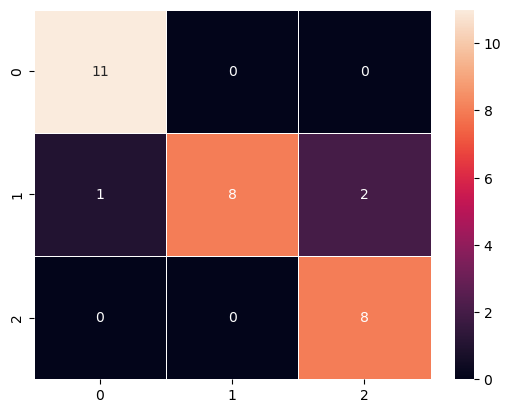

In [48]:
Confusion_Matrix = confusion_matrix(y_pred, y_test)
print(f"Confusion Matrix:\n {Confusion_Matrix}")
sns.heatmap(Confusion_Matrix, annot=True, linecolor='white', linewidths=0.5)
plt.show()

# KNN (K-Nearest Nightbours)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred = knn.predict(X_test)

In [53]:
acc = accuracy_score(y_pred, y_test)

In [54]:
acc

0.8666666666666667

Selecting K Value for best accuracy

In [55]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error = np.mean(y_pred!=y_test)
    error_rate.append(error)

In [56]:
error_rate

[0.13333333333333333,
 0.2,
 0.1,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

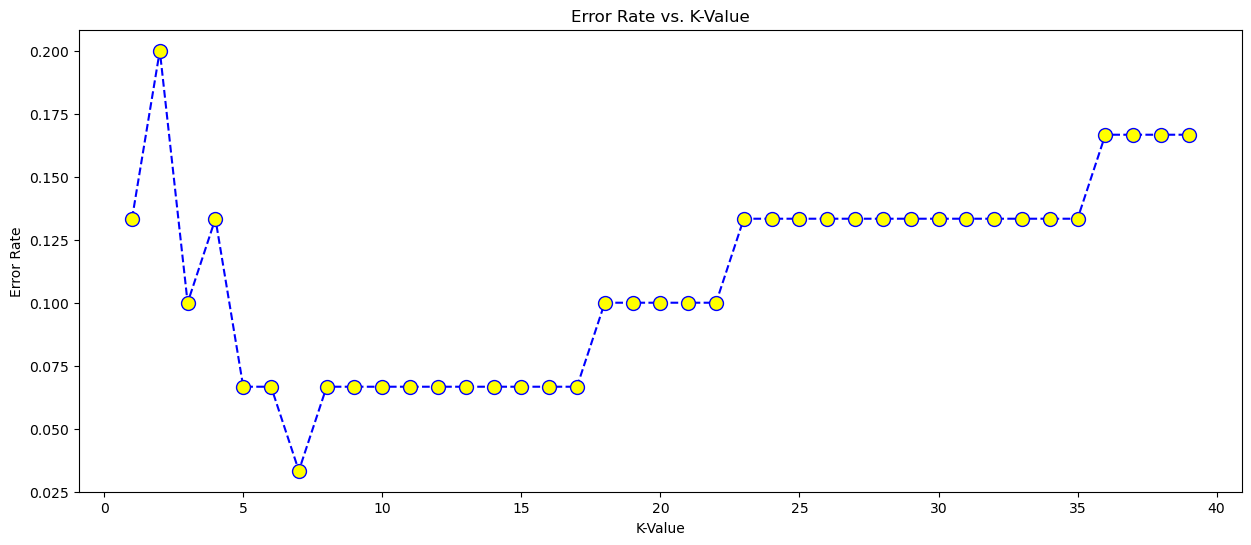

In [57]:
plt.figure(figsize = (15,6))
plt.plot(range(1,40),error_rate,linestyle = '--',marker = 'o', color = 'blue',markersize = 10, markerfacecolor = 'yellow')
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

As we can see in the above graph, The lowest point on the error rate plot indicates that with k = 7 my model is making the fewest errors when making predictions on the dataset. This is the value of k that optimizes the model's performance.

In [58]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    classification = classification_report(y_pred,y_test)
    print(f'With K = {i}')
    print(f'Classification Reports:\n {classification}')

With K = 1
Classification Reports:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.67      0.80        12
           2       0.70      1.00      0.82         7

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.86        30

With K = 2
Classification Reports:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.57      0.73        14
           2       0.50      1.00      0.67         5

    accuracy                           0.80        30
   macro avg       0.81      0.86      0.78        30
weighted avg       0.89      0.80      0.80        30

With K = 3
Classification Reports:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.

In [59]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.9666666666666667


Confusion Matrix:
 [[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


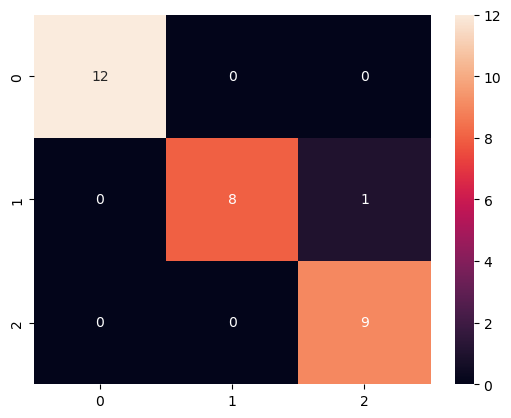

In [60]:
print(f'Confusion Matrix:\n {confusion_matrix(y_pred,y_test)}')
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True)
plt.show()

In [61]:
print(f'Classification Reports:\n{classification_report(y_pred, y_test)}')

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dc = DecisionTreeClassifier()

In [64]:
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_predict = dc.predict(X_test)

In [66]:
y_predict

array([0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 1, 0, 1, 2, 0, 1])

In [67]:
accu = accuracy_score(y_predict, y_test)

In [68]:
accu

0.9333333333333333

Confusion Matrix:
[[12  0  0]
 [ 0  8  2]
 [ 0  0  8]]


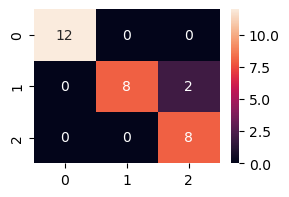

In [69]:
print(f'Confusion Matrix:\n{confusion_matrix(y_predict, y_test)}')
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix(y_predict,y_test), annot = True)
plt.show()

In [70]:
(12+8+8)/(12+8+8+2)

0.9333333333333333

In [71]:
from sklearn import tree

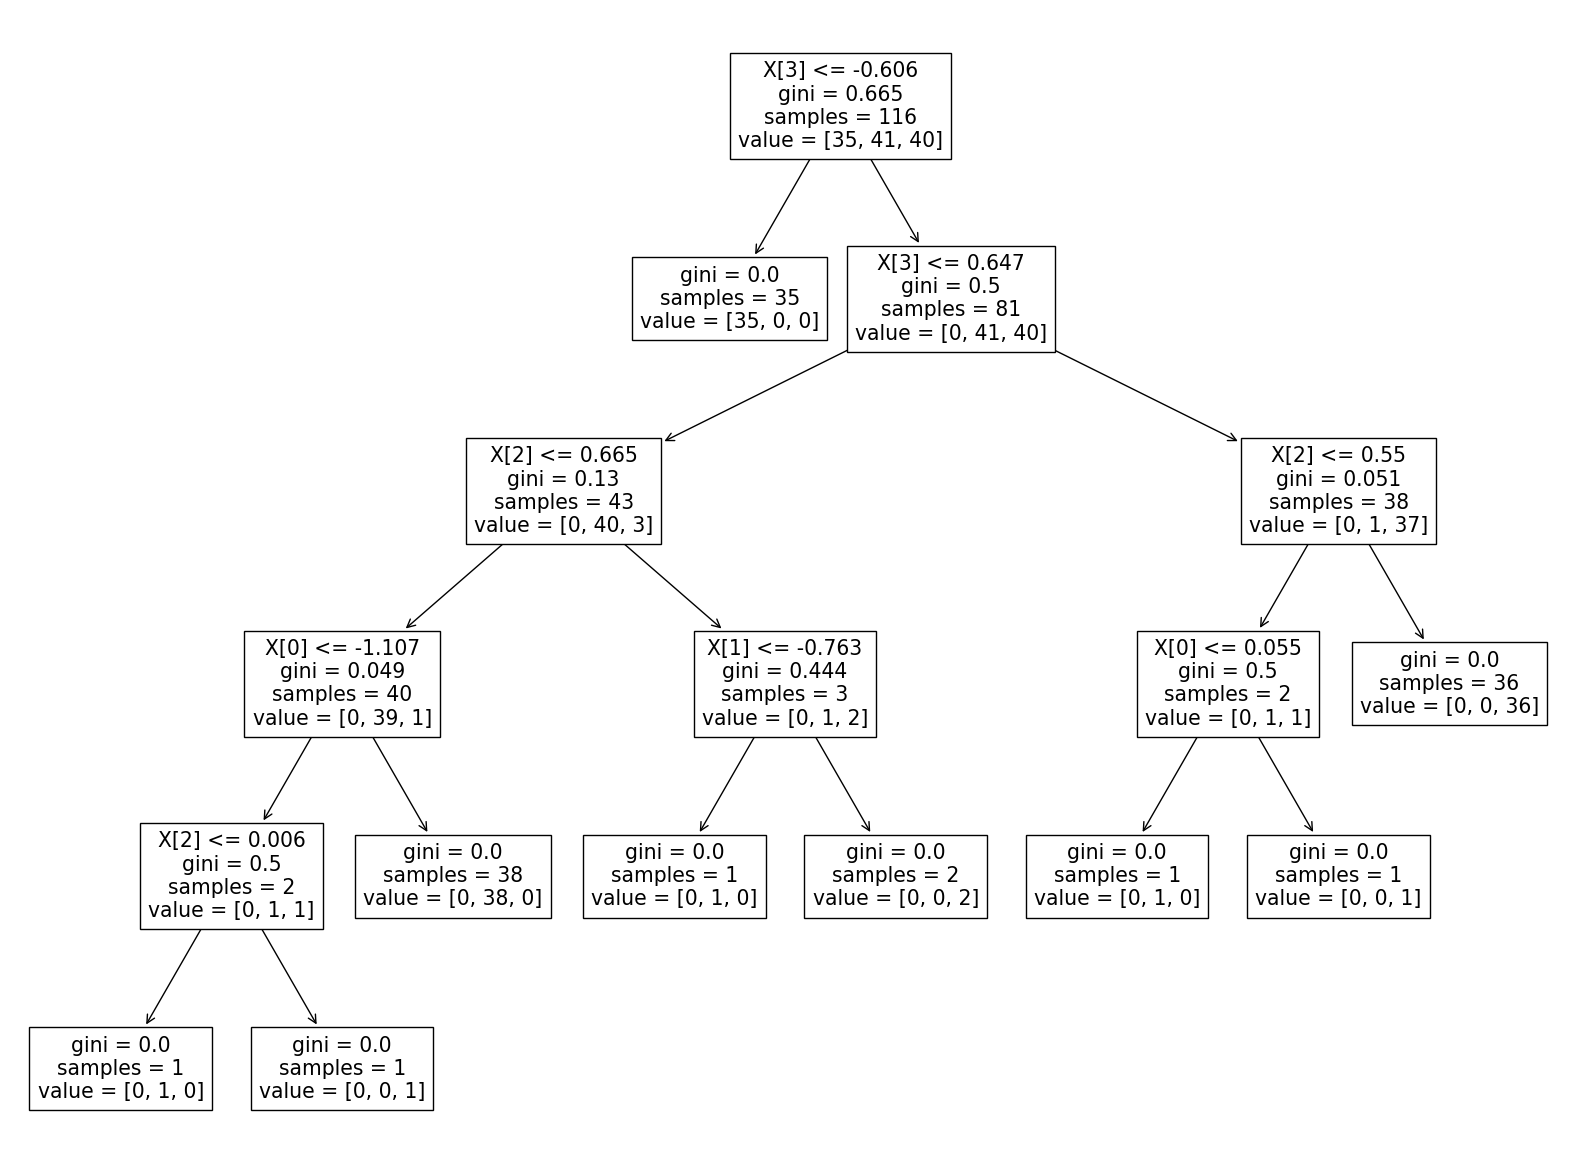

In [72]:
plt.figure(figsize = (20,15))
tree.plot_tree(dc)
plt.show()

# Random Forest Algorithm

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(n_estimators=30)

In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [76]:
y_predicts = rfc.predict(X_test)

In [77]:
y_predicts

array([0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 1, 0, 1, 2, 0, 1])

In [78]:
accurcy_scoree = accuracy_score(y_predicts, y_test)

In [79]:
accurcy_scoree

0.9333333333333333

In [80]:
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100]}

In [81]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=True)

In [82]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=30),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=True)

In [83]:
final_model_RF = grid_search.best_estimator_

In [84]:
final_model_RF

RandomForestClassifier(n_estimators=10)

In [85]:
rfc1 = RandomForestClassifier(n_estimators = 10)

In [86]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [87]:
y_predictt = rfc1.predict(X_test)

In [88]:
y_predictt

array([0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 0, 1, 2, 0, 1])

In [89]:
Accuracy = accuracy_score(y_predictt, y_test)

In [90]:
Accuracy

0.9666666666666667

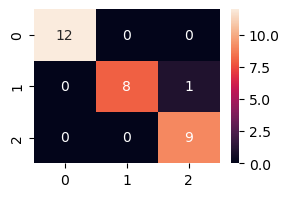

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


In [91]:
plt.figure(figsize = (3,2))
cm = confusion_matrix(y_predictt, y_test)
sns.heatmap(cm, annot=True)
plt.show()

print(confusion_matrix(y_predictt,y_test))

In [92]:
print(classification_report(y_predictt, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Model Evaluation

We evaluated the performance of four different classification models: 

Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest.

**Logistic Regression:**
Accuracy: 90%

**K-Nearest Neighbors (KNN) with K=7:**
Accuracy: 97%

**Decision Tree:**
Accuracy: 93%

**Random Forest:**
Accuracy: 93%

# Model Selection and Interpretation

Based on the accuracy scores, we observed that the K-Nearest Neighbors (KNN) model with K=7 achieved the highest accuracy (97%). However, it's essential to consider other factors when choosing the best model for a specific task. These factors may include model interpretability, computational efficiency, and the goals of the analysis.

# Conclusion:
In conclusion, we conducted a comprehensive analysis of the Iris dataset using various machine learning models. The K-Nearest Neighbors (KNN) model with K=7 demonstrated the highest accuracy among the models, achieving an accuracy of 97%. This suggests that KNN is a suitable choice for this dataset. However, the choice of the best model depends on various factors, including the specific goals of the analysis.

This report provides valuable insights into the performance of different models and serves as a basis for further analysis or decision-making in tasks related to iris flower species classification.



# Thank you :)